In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_actual_paths(name: str) -> pd.DataFrame:
    df: pd.DataFrame = pd.read_csv(name, names=["from", "to", "distance"], dtype=str)
    df["vertices"] = df["from"] + "-" + df["to"]
    df["distance"] = df["distance"].astype(int)
    df = df.drop(columns=["from", "to"])
    df = df.set_index("vertices")
    return df


def read_landmarks(name):
    df: pd.DataFrame = pd.read_csv(name, names=['landmark_count', "landmark_selection", "algorithm", "vertices", "approximate_distance"])
    df = df.pivot_table(index=['landmark_count', "landmark_selection", "algorithm"], columns=["vertices"],values=['approximate_distance'])
    df.columns=df.columns.droplevel(level=0)
    return df



In [133]:


astro_paths = read_actual_paths("actualPaths-astro.txt")
astro_landmarks = read_landmarks("landmarks-astro.txt")

vertex_pairs = astro_paths.index.values.tolist()

approximation_errors_astro = []

for vertex_pair in vertex_pairs:
    precise_dist = int(astro_paths.loc[vertex_pair])
    appr_dists = astro_landmarks[vertex_pair]
    approximation_errors_astro.append(list((abs(appr_dists-precise_dist))/precise_dist))

approximation_errors_astro = np.array(approximation_errors_astro).mean(axis=0)


In [134]:
google_paths = read_actual_paths("actualPaths-google.txt")
google_landmarks = read_landmarks("landmarks-google.txt")

vertex_pairs = google_paths.index.values.tolist()

approximation_errors_google = []

for vertex_pair in vertex_pairs:
    precise_dist = int(google_paths.loc[vertex_pair])
    appr_dists = google_landmarks[vertex_pair]
    approximation_errors_google.append(list((abs(appr_dists-precise_dist))/precise_dist))

approximation_errors_google=np.array(approximation_errors_google).mean(axis=0)

In [135]:
vk_paths = read_actual_paths("actualPaths-vk.txt")
vk_landmarks = read_landmarks("landmarks-vk.txt")

vertex_pairs = vk_paths.index.values.tolist()

approximation_errors_vk = []

for vertex_pair in vertex_pairs:
    precise_dist = int(vk_paths.loc[vertex_pair])
    appr_dists = vk_landmarks[vertex_pair]
    approximation_errors_vk.append(list((abs(appr_dists-precise_dist))/precise_dist))

approximation_errors_vk = np.array(approximation_errors_vk).mean(axis=0)

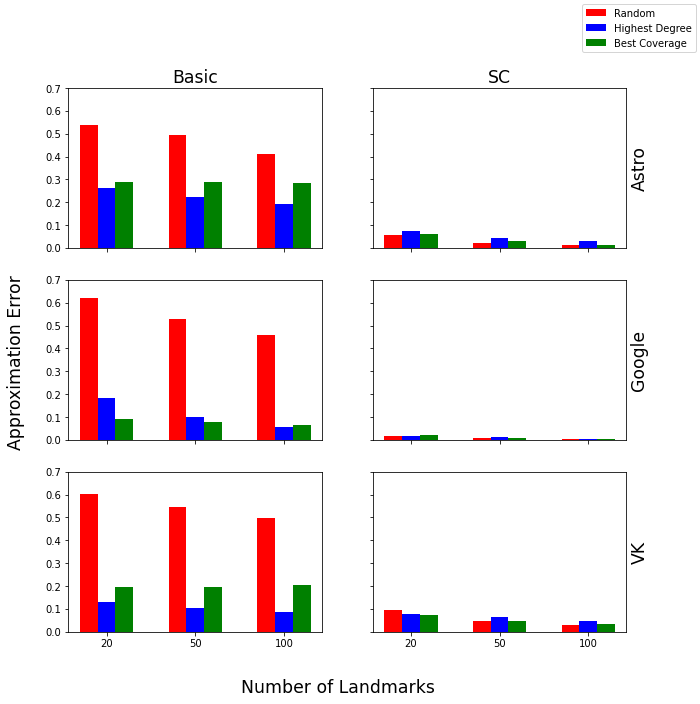

In [136]:
fig, ax = plt.subplots(3,2, sharex=True, sharey=True,figsize=(10,10))

fig.text(0.5, 0.04, 'Number of Landmarks', ha='center',size='xx-large')
fig.text(0.04, 0.5, 'Approximation Error', va='center', rotation='vertical',size='xx-large')
ax[0][0].set_title("Basic",size='xx-large')
ax[0][1].set_title("SC",size='xx-large')
ax[0][-1].yaxis.set_label_position("right")
ax[0][-1].set_ylabel("Astro",size='xx-large')
ax[1][-1].yaxis.set_label_position("right")
ax[1][-1].set_ylabel("Google",size='xx-large')
ax[2][-1].yaxis.set_label_position("right")
ax[2][-1].set_ylabel("VK",size='xx-large')

i = 0
for a in [approximation_errors_astro,approximation_errors_google,approximation_errors_vk]:
    x = np.array([1,2,3])

    ax[i][0].bar(x-0.2, a[0::6], width=0.2,color='r',align='center' )
    ax[i][0].bar(x, a[2::6], width=0.2,color='b',align='center' )
    ax[i][0].bar(x+0.2, a[4::6], width=0.2,color='g',align='center' )
    ax[i][0].set_xticks(x,['20','50','100'])
    ax[i][0].set_ylim(0,0.7)
    # ax[i][0].grid()
 
    ax[i][1].bar(x-0.2, a[1::6], width=0.2,color='r',align='center' )
    ax[i][1].bar(x, a[3::6], width=0.2,color='b',align='center' )
    ax[i][1].bar(x+0.2, a[5::6], width=0.2,color='g',align='center' )
    ax[i][1].set_xticks(x,['20','50','100'])
    ax[i][1].set_ylim(0,0.7)
    # ax[i][1].grid()

    i+=1

fig.legend(['Random', 'Highest Degree', 'Best Coverage'])

plt.savefig("landmarks.png")
plt.show()
